In [3]:
import math
from scipy.constants import h, hbar, e, k, pi

Phi0=h/2/e; #flux quantum
 

In [4]:
import scipy.constants
scipy.constants.pi

3.141592653589793

# Transmon transition frequency,  $f_{01}$

In [5]:
# transmon
J = 2e5 # A/m^2
A = 0.2e-6 * 0.5e-6 
#I0 = J * A

I0 =30e-9
#Cj = 100 * 1e-15/(1e-6)**2 * A       # 100 fF/um^2
Cj=5e-15
Cs = 50e-15
C = Cj + Cs

Ej = hbar * I0 /(2 * e) /h / 1e9  # in GHz
Ec = e **2 / (2*C) /h / 1e9
f = math.sqrt(8 * Ej * Ec)-Ec # in GHz
print('Ej={:.3f} GHz, Ec={:.3f} GHz,Ej/Ec={:.3f}, f01={:.3f} GHz'.format(Ej, Ec, Ej/Ec, f))

Ej=14.901 GHz, Ec=0.352 GHz,Ej/Ec=42.309, f01=6.127 GHz


## Ambegaokar-Baratoff formula for tunnel junctions, $R_n$ vs $I_c$

$$ I_c R_n = (\pi\Delta /2e)\tanh(\Delta/2kT)$$
At $T=0$, $$I_cR_n = \pi\Delta (0)/2e$$
Also, $$\Delta (0) = 1.764 k_B T_c$$

In [6]:
# For aluminum 
Tc = 1.275 # for 35nm film
Delta0 = 1.764 * k * Tc # aluminium
print ('delta(0) = {:.3E} eV'.format(Delta0/e))
print ('IcRn = {:.3E} eV'.format(Delta0 * pi / e/2))

# Ic to Rn
Ic  =60e-9
Rn = pi * Delta0 /(2 * e) /Ic
print ('Ic to Rn, Ic = {:.3e} (A), Rn = {:.3e} (Ohm)'.format(Ic, Rn))

# Rn to Ic
Rn = 9.9e3
Ic = pi * Delta0 /(2 * e) / Rn
print ('Rn to Ic, Rn = {:.3e} (Ohm), Ic = {:.3e} (A)'.format(Rn, Ic))

print(Delta0/e)

delta(0) = 1.938E-04 eV
IcRn = 3.044E-04 eV
Ic to Rn, Ic = 6.000e-08 (A), Rn = 5.074e+03 (Ohm)
Rn to Ic, Rn = 9.900e+03 (Ohm), Ic = 3.075e-08 (A)
0.0001938123766143523


In [7]:
## CSFQ in "Flux qubit revisited" paper (https://arxiv.org/abs/1508.06299).
# Qubit B, T1=55 us, delta=4.68 GHz
Cs = 51e-15 # F.
alpha = 0.42
Jc = 2.9        # uA/um^2.
Ej_alpha = 43   # in GHz. alpha mean alpha-junction.
Ec_alpha = 0.35

# Unit conversion to SI unit
Ej_alpha = Ej_alpha * 1e9 * h
Ec_alpha = Ec_alpha * 1e9 * h
Jc = Jc * 1e-6 /(1e-6)**2 # A/m^2

# all in SI unit. All parameters for larger junction.
Ej = Ej_alpha / alpha
Ec = Ec_alpha * alpha
I0 = Ej * (2 * e) / hbar # critical current
A = I0 / Jc  # area of large junction
Cj = e**2 / Ec  # looks their Ec definition is 4 * e^2/C, not e^2/C?
A_est = Cj / (100e-15/(1e-6)**2)  # Estimated area based on Cj. 100 fF/um^2 assumed.

print ('Ej(GHz)=', Ej/1e9/h), print ('Ej_alpha(GHz)=', Ej/1e9/h*alpha,'\n')
print ('Ec(GHz)=',Ec/1e9/h), print ('Ec_alpha(GHz)=',Ec/1e9/h/alpha,'\n')
print ('I0(nA)=',I0/1e-9), print ('I0_alpha(nA)=',I0/1e-9 *alpha,'\n')
print ('A(um^2)=',A/(1e-6)**2), print ('A_alpha(um^2)=',A/(1e-6)**2*alpha,'\n')
print ('Cj(fF)=',Cj/1e-15), print ('Cj_alpha(fF)=',Cj/1e-15*alpha,'\n')
print('A_est(um^2)=', A_est/(1e-6)**2),print('A_alpha_est(um^2)=', A_est/(1e-6)**2*alpha,'\n')

Ej(GHz)= 102.38095238095237
Ej_alpha(GHz)= 42.99999999999999 

Ec(GHz)= 0.147
Ec_alpha(GHz)= 0.35 

I0(nA)= 206.12915330601882
I0_alpha(nA)= 86.5742443885279 

A(um^2)= 0.0710790183813858
A_alpha(um^2)= 0.02985318772018204 

Cj(fF)= 263.54053506192525
Cj_alpha(fF)= 110.6870247260086 

A_est(um^2)= 2.6354053506192527
A_alpha_est(um^2)= 1.1068702472600862 



(None, None)

# Asymmetric transmon frequency

In [8]:
%matplotlib

Using matplotlib backend: Qt5Agg


USS = 5.891 GHz
LSS = 4.810 GHz


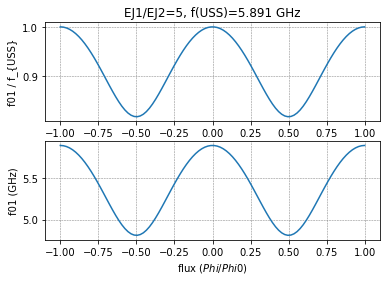

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rc
# rc('text', usetex=True)

f_uss =5.891 # USS frequency in GHz
alpha =  5 # alpha= Ej1 / Ej2, Ej1 > Ej2, junction size ratio
d = (alpha - 1) / (1 + alpha)
flux = np.linspace(-1, 1, 100)  # unit of Phi0
ratio  = np.sqrt(np.fabs(np.cos(np.pi * flux)) * np.sqrt(1 + (d * np.tan(np.pi * flux))**2))

fig, (axes1, axes2) = plt.subplots(2,1)
lines1, = axes1.plot(flux, ratio) 
lines2, = axes2.plot(flux, ratio * f_uss) 

axes1.set_ylabel('f01 / f_{USS}')
#axes2.set_xlabel('flux ($\Phi / \Phi_0$)')
axes2.set_xlabel(f'flux ($Phi / Phi0$)')
axes2.set_ylabel('f01 (GHz)')
axes1.grid(which='both',color='gray', linestyle='--', linewidth=0.5)
axes2.grid(which='both',color='gray', linestyle='--', linewidth=0.5)
#axes1.legend((lines1, lines11),('LSS', 'USS'))
#axes2.legend((lines2, lines12),('LSS', 'USS'))

title = r'EJ1/EJ2={:.2g}, f(USS)={} GHz'.format(alpha, f_uss)
axes1.set_title(title)

print(f'USS = {np.max(ratio*f_uss):.3f} GHz')
print(f'LSS = {np.min(ratio*f_uss):.3f} GHz')

In [13]:
np.max([1,2,3])

3

# Square kinetic inductance
$$L_{sq} = \frac{\hbar R_{sq}}{\pi\Delta},$$
where $R_{sq}$ is normal-state sheet resistance.

In [25]:
import math
from scipy.constants import h, hbar, e, k, pi

Phi0=h/2/e; #flux quantum
 
# Parameters
rho_LT = 1.64e-10 # ohm*m
t = 100e-9 # thickness
Tc = 1.2
R_sq = rho_LT / t
delta =  1.764 * k * Tc 
L_sq = hbar * R_sq / (pi *  delta)
print('Lsq = {:.3g}'.format(L_sq))

Lsq = 1.88e-15


# Useful Formula

\begin{eqnarray}
\chi &=& \frac{g_{01}^2}{\Delta}\frac{\alpha}{\Delta+\alpha} \\
\Delta&=&\omega_{01} - \omega_r
\end{eqnarray}